# Introduction 

Data was collected from Environment and Climate Change Canada. The data comes from the weather station at Pearson International Airport which updates the weather measurement every 5 minutes. Each individual reading is then taken and aggregated by day to output daily weather measurements.
<br></br>
<br></br>
Source of data: https://toronto.weatherstats.ca/download.html
<br></br>
Info about the dataset can be found on the about page under the links section. 
<br></br>
Goal: binary classification of precipitation. 

Variables:
- __date__: the date 
- __max_temperature__: the max temperature 
- __avg_hourly_temperature__: the average of the hourly temperature (Think, the sum of the average temperature for each hr divided by 24 hrs)
- __avg_temperature__: the average temperature for the day. Calculated using the 5 min weather updates.  
- __min_temperature__: the min temperature 
- __max_humidex__: the humidex is a meausure that indicates how hot humans feel. A value of 20-29 is comfortable, 30-39 is somewhat discomforting, 40-45 is great discomfort and 45+ is risk of heat stroke. (Source: https://www.ccohs.ca/oshanswers/phys_agents/humidex.html)
- __min_windchill__: the wind chill is a meausure of how cold humans feel given the speed speed.
- __max_relative_humidity__: the max humidity of for a day. Humidity is defined as the amount of water vapor actually in the air, expressed as a percentage of the maximum amount of water vapor the air can hold at the same temperature. (source: https://www.nationalgeographic.org/encyclopedia/humidity/)
- __avg_hourly_relative_humidity__: the average hourly humidity of for a day.
- __avg_relative_humidity__: the average humidity
- __min_relative_humidity__: the min humidity of for a day.
- __max_dew_point__: The max dew point for a day. Dew point is defined as the temperature the air needs to be cooled to, given a constant pressure, in order to achieve a relative humidity of 100%. The higher the dew point, the greater the amount of moisture in the air. (source: https://www.weather.gov/arx/why_dewpoint_vs_humidity)
- __avg_hourly_dew_point__: the average hourly dew point
- __avg_dew_point__: the average dew point
- __min_dew_point__: the min dew point
- __max_wind_speed__: the max wind speed in km/h 
- __avg_hourly_wind_speed__: the average hourly wind speed in km/h
- __avg_wind_speed__: the average wind speed in km/h
- __min_wind_speed__: the min wind speed in km/h
- __max_wind_gust__: The highest wind gust (in km/h) recorded for the day. A wind gust is defined as a 20 second increase in wind speed above 16 knots with lulls of at least 9 knots (source: https://graphical.weather.gov/definitions/defineWindGust.html#:~:text=Wind%20Gust%20Definition&text=Is%20a%20sudden%2C%20brief%20increase,is%20at%20least%209%20knots.)
- __wind_gust_dir_10s__: the direction of the wind in degrees. A value of 24 indicates that gust came from the direction of 240 degrees on a compass, roughly South West (source: https://toronto.weatherstats.ca/charts/wind_gust-daily.html)
- __max_pressure_sea__: The max sea-level pressure  for a day. The sea-level pressure is a reduced pressure reading that estimates the pressure that would exist at sea level. (Source: https://www.weather.gov/bou/pressure_definitions)
- __avg_hourly_pressure_sea__: The average hourly sea-level pressure for a day; measured in kPa.
- __avg_pressure_sea__: The average sea-level pressure  for a day; measured in kPA.
- __min_pressure_sea__: The min sea-level pressure  for a day; measured in kPA.
- __max_pressure_station__: the max station pressure. The pressure observed at a specific elevation, aka the true barometric pressure of a location. Measured in kPa. (source: https://www.weather.gov/bou/pressure_definitions#:~:text=STATION%20PRESSURE%3A%20This%20is%20the,lies%20directly%20above%20the%20point.)
- __avg_hourly_pressure_station__: the average station pressure 
- __avg_pressure_station__: the average station pressure 
- __min_pressure_station__: the min station pressure 
- __max_visibility__: The distance an object can be clearly; seen measured in meters. (Source: www.definitions.net )
- __avg_hourly_visibility__: measured in meters
- __avg_visibility__: measured in meters
- __min_visibility__: measured in meters
- __max_health_index__: the max air quality health index for the day where 1-3 is low risk, 4-6 is moderate risk, 7-70 is high risk and 10+ is very high risk (source: https://weather.gc.ca/airquality/pages/provincial_summary/on_e.html)
- __avg_hourly_health_index__: the average hourly air quality health index for the day
- __avg_health_index__: the average air quality health index for the day
- __min_health_index__: the min air quality health index for the day
- __heatdegdays__: Heating Degree Days are a measure of how cold the temperature was for a given day 
- __cooldegdays__: Cooling degree days are a measure of how hot the temperature was for a gien day. Higher number means hotter a day. (source: https://www.eia.gov/energyexplained/units-and-calculators/degree-days.php)
- __growdegdays_5__: Growth Degree Days is the average daily temperature accounting for the minnimum develpment threshold at which crops grow. The 5 indicates that the threshold is 5 degrees. This the temperature needed for most plants to grow (Source: https://extension.psu.edu/understanding-growing-degree-days , https://open.canada.ca/data/en/dataset/c7b40829-bacb-4f67-a19b-e090b3d32992?activity_id=f4eda732-4086-4afc-a84f-777248b93192)
- __growdegdays_7__: Growth Degree Days with a threshold of 7 degrees.
- __growdegdays_10__: Growth Degree Days with a threshold of 10 degrees. This is the temperature needed for beans and grasshoppers to grow.
- __precipitation__: the amount of rain and snow that fell for a given day  in mm
- __rain__: the amount of rainfall in mm for a given day
- __snow__: the amouny of snowfall in mm for a given day 
- __snow_on_ground__: the amount of snow on the ground in mm
- __sunrise__: the time that sunrise occurs
- __sunset__: the time that sunset occurs 
- __daylight__: the time in hours between sunset and sunrise 
- __sunrise_f__: the forecasted sunrise
- __sunset_f__: the forecasted sunset
- __min_uv_forecast__: the min forecasted UV index 
- __max_uv_forecast__: the max forecasted UV index forecast 
- __min_high_temperature_forecast__: the min forecasted high temperature
- __max_high_temperature_forecast__: the max forecasted high temperature
- __min_low_temperature_forecast__: the min forecasted low temperature
- __max_low_temperature_forecast__: the max forecasted low temperature
- __solar_radiation__: the amount of energy emitted from the sun. (Source: https://ambientweather.com/solarradiation.html)
- max_cloud_cover_4
- avg_hourly_cloud_cover_4
- avg_cloud_cover_4
- min_cloud_cover_4
- __max_cloud_cover_8__: the highest cloud coverage value on the cloud coverage eights scale, also called Oktas scale. Each value of the sclae represents an amount of cloud coverage where 0= clear skys, 4= half cloud, and 8= completely cloudy. (Source: https://polarpedia.eu/en/okta-scale/)
- __avg_hourly_cloud_cover_8__: the average hourly cloud coverage value on the Oktas scale
- __avg_cloud_cover_8__: the average cloud coverage value on the Oktas scale
- __min_cloud_cover_8__: the min cloud coverage value on the Oktas scale
- max_cloud_cover_10: 
- avg_hourly_cloud_cover_10
- avg_cloud_cover_10
- min_cloud_cover_10

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
# Load the data 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("data/weatherstats_toronto_daily.csv")
dataset.head(10)

C:\Users\Dwight\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,date,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
0,2021-06-29,32.5,24.41,26.80,21.1,41.0,NaN,96,82.3,77.0,...,NaN,NaN,8.0,6.0,5.5,3.0,NaN,NaN,NaN,NaN
1,2021-06-28,32.2,27.49,26.95,21.7,39.0,NaN,86,63.6,66.0,...,NaN,NaN,6.0,3.5,3.5,1.0,NaN,NaN,NaN,NaN
2,2021-06-27,30.7,27.40,27.25,23.8,39.0,NaN,73,63.4,63.5,...,NaN,NaN,8.0,4.9,4.5,1.0,NaN,NaN,NaN,NaN
3,2021-06-26,27.5,23.97,23.25,19.0,36.0,NaN,100,82.5,83.0,...,NaN,NaN,8.0,7.8,7.5,7.0,NaN,NaN,NaN,NaN
4,2021-06-25,25.8,21.24,22.30,18.8,30.0,NaN,100,74.0,75.0,...,NaN,NaN,8.0,7.7,6.5,5.0,NaN,NaN,NaN,NaN
5,2021-06-24,28.1,22.42,22.00,15.9,30.0,NaN,70,50.5,51.0,...,NaN,NaN,8.0,5.8,5.0,2.0,NaN,NaN,NaN,NaN
6,2021-06-23,23.7,17.55,16.25,8.8,NaN,NaN,79,53.1,57.0,...,NaN,NaN,6.0,3.4,3.5,1.0,NaN,NaN,NaN,NaN
7,2021-06-22,19.5,14.46,14.75,10.0,NaN,NaN,94,54.8,63.0,...,NaN,NaN,8.0,5.8,5.0,2.0,NaN,NaN,NaN,NaN
8,2021-06-21,29.7,21.06,20.65,11.6,34.0,NaN,100,74.9,72.5,...,NaN,NaN,8.0,7.0,5.5,3.0,NaN,NaN,NaN,NaN
9,2021-06-20,27.1,21.15,20.55,14.0,32.0,NaN,91,68.2,71.0,...,NaN,NaN,8.0,3.8,4.0,0.0,NaN,NaN,NaN,NaN


The above table is a subset of the first 10 rows of the dataset. As we can see, the dataset is ordered in reverse chronological order with 70 columns and 10,000 rows. We are also able to observe that every column except for the `date`, `sunrise`, and `sunset` columns are numerical in nature. Moreover, we are able to see that the dataset has quite a few missing values.  

In [3]:
dataset.shape

(10000, 70)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           10000 non-null  object 
 1   max_temperature                10000 non-null  float64
 2   avg_hourly_temperature         10000 non-null  float64
 3   avg_temperature                10000 non-null  float64
 4   min_temperature                10000 non-null  float64
 5   max_humidex                    2783 non-null   float64
 6   min_windchill                  3354 non-null   float64
 7   max_relative_humidity          10000 non-null  int64  
 8   avg_hourly_relative_humidity   10000 non-null  float64
 9   avg_relative_humidity          10000 non-null  float64
 10  min_relative_humidity          10000 non-null  int64  
 11  max_dew_point                  10000 non-null  float64
 12  avg_hourly_dew_point           10000 non-null  

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
# Validate the Integrity of the data 

### Missing Values 


In [5]:
def find_missing_vals(dataset):
    '''Display columsn with missing data and indicate how many values are missing for each column.'''
    missing_vals = dataset.isnull().sum()
    cols_list = dataset.columns
    col_count = 0

    for col, val in zip(cols_list, missing_vals):
        if val > 0:
            print('{}: {} values misiing'.format(col, val))
            col_count += 1
    print('\n{} columns have missing values'.format(col_count))
    return zip(cols_list, missing_vals)

In [6]:
find_missing_vals(dataset)

max_humidex: 7217 values misiing
min_windchill: 6646 values misiing
max_wind_gust: 3061 values misiing
wind_gust_dir_10s: 3062 values misiing
max_health_index: 6277 values misiing
avg_hourly_health_index: 6277 values misiing
avg_health_index: 6277 values misiing
min_health_index: 6277 values misiing
precipitation: 21 values misiing
rain: 30 values misiing
snow: 22 values misiing
snow_on_ground: 2169 values misiing
sunrise: 7263 values misiing
sunset: 7263 values misiing
daylight: 7263 values misiing
sunrise_f: 7263 values misiing
sunset_f: 7263 values misiing
min_uv_forecast: 7895 values misiing
max_uv_forecast: 7895 values misiing
min_high_temperature_forecast: 7263 values misiing
max_high_temperature_forecast: 7263 values misiing
min_low_temperature_forecast: 7263 values misiing
max_low_temperature_forecast: 7263 values misiing
solar_radiation: 10000 values misiing
max_cloud_cover_4: 10000 values misiing
avg_hourly_cloud_cover_4: 10000 values misiing
avg_cloud_cover_4: 10000 values m

#### Explaining missing values 

We see that 36 columns in the dataset contain missing values and 34 columns have no missing values. Recall there are 10000 rows in the dataset, meaning that 5 columns have no entries and 23 columns conatain more than 6000 missing values.  

The `percipitation`, `rain` and `snow` columns have the least missing of columns that conain missing values. These columns contain less than 30 missing values.  

In [7]:
cloud_not_missing = dataset[dataset.avg_hourly_cloud_cover_8.notnull()]
cloud_not_missing[['date', 'max_cloud_cover_8', 'avg_hourly_cloud_cover_8', 'avg_cloud_cover_8', 'min_cloud_cover_8']]

,date,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8
0,2021-06-29,8.0,6.0,5.5,3.0
1,2021-06-28,6.0,3.5,3.5,1.0
2,2021-06-27,8.0,4.9,4.5,1.0
3,2021-06-26,8.0,7.8,7.5,7.0
4,2021-06-25,8.0,7.7,6.5,5.0
...,...,...,...,...,...
2816,2013-10-13,8.0,7.3,5.5,3.0
2817,2013-10-12,4.0,1.6,2.5,1.0
2818,2013-10-11,2.0,1.5,1.5,1.0
2819,2013-10-10,8.0,3.2,4.5,1.0


Cloud coverage data wasnt collected by the weather station using the Oktas scale until October 9, 2013. That means we have data from October 9, 2013 to June 29th, 2021 abput weather coverage in the following variables: `max_cloud_cover_8`, 
                `avg_hourly_cloud_cover_8`, `avg_cloud_cover_8`, `min_cloud_cover_8`. 

In [8]:
sun_not_missing = dataset[dataset.sunrise.notnull()]
sun_not_missing[['date', 'sunrise', 'sunset', 'daylight']]

,date,sunrise,sunset,daylight
0,2021-06-29,5:39:00,21:04:00,15.42
1,2021-06-28,5:38:00,21:04:00,15.43
2,2021-06-27,5:38:00,21:04:00,15.43
3,2021-06-26,5:37:00,21:04:00,15.45
4,2021-06-25,5:37:00,21:04:00,15.45
...,...,...,...,...
2732,2014-01-05,7:51:00,16:55:00,9.07
2733,2014-01-04,7:52:00,16:54:00,9.03
2734,2014-01-03,7:52:00,16:53:00,9.02
2735,2014-01-02,7:52:00,16:52:00,9.00


Data related to sunlight wasnt collected by this weather station until January 1st, 2014. Therefore any data related to ant time before January 1st, 2014 for the `date`, `sunrise`, `sunset` and `daylight` variables will be considered missing. 

In [9]:
healthindex_not_missing = dataset[dataset.max_health_index.notnull()]
healthindex_not_missing[['date', 'max_health_index', 'avg_hourly_health_index', 'avg_health_index', 'min_health_index']]

,date,max_health_index,avg_hourly_health_index,avg_health_index,min_health_index
0,2021-06-29,3.4,2.3,2.5,1.5
1,2021-06-28,3.2,2.6,2.6,2.1
2,2021-06-27,3.1,2.8,2.8,2.4
3,2021-06-26,3.0,2.6,2.6,2.2
4,2021-06-25,3.8,3.1,3.2,2.6
...,...,...,...,...,...
3719,2011-04-24,4.0,2.9,3.2,2.4
3720,2011-04-23,3.6,2.8,3.0,2.3
3721,2011-04-22,3.8,3.2,3.3,2.8
3722,2011-04-21,3.7,3.1,3.1,2.6


No data wass collected about the air quality health index before April 20th, 2011. Therefore there will be missing values in the `max_health_index`, `avg_hourly_health_index`, `avg_health_index`, `min_health_index` columns. 

#### Removing missing values 

In [10]:
#drop columns that have more than 60% of their values missing 
dropped_cols = ['max_humidex', 'min_windchill', 'max_health_index', 'avg_hourly_health_index', 'avg_health_index',
               'min_health_index', 'sunrise', 'sunset', 'daylight', 'sunrise_f', 'sunset_f', 'min_uv_forecast',
               'max_uv_forecast', 'min_high_temperature_forecast', 'max_high_temperature_forecast',
                'min_low_temperature_forecast', 'max_low_temperature_forecast', 'solar_radiation', 'max_cloud_cover_4',
               'avg_hourly_cloud_cover_4', 'avg_cloud_cover_4', 'min_cloud_cover_4', 'max_cloud_cover_8', 
                'avg_hourly_cloud_cover_8', 'avg_cloud_cover_8', 'min_cloud_cover_8', 'max_cloud_cover_10', 
               'avg_hourly_cloud_cover_10', 'avg_cloud_cover_10', 'min_cloud_cover_10']
data_reduced = dataset.drop(columns=dropped_cols)

In [11]:
data_reduced.shape 

(10000, 40)

In [12]:
find_missing_vals(data_reduced)

max_wind_gust: 3061 values misiing
wind_gust_dir_10s: 3062 values misiing
precipitation: 21 values misiing
rain: 30 values misiing
snow: 22 values misiing
snow_on_ground: 2169 values misiing

6 columns have missing values


By removing columns that have more than 60% of their data missing, the dataset is left with 40 columns. Luckily the leftover columns with missing values can be calculated from the other data in the dataset. For example, `percipitation` is the sum of rain and snow, while `snow_on_ground` is a function of snow and temperature. Meaning, we can easily impute the values to make the dataset clean. 

<br></br>
<br></br>
<br></br>
<br></br>
### Range of Values 

In [13]:
# suppress scientific notation
pd.options.display.float_format = '{:.2f}'.format
data_reduced.describe()

,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,max_dew_point,avg_hourly_dew_point,...,min_visibility,heatdegdays,cooldegdays,growdegdays_5,growdegdays_7,growdegdays_10,precipitation,rain,snow,snow_on_ground
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,...,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,9979.00,9970.00,9978.00,7831.00
mean,13.51,8.99,8.85,4.20,85.54,69.61,69.27,53.01,6.43,3.26,...,14526.08,10.16,1.01,6.67,5.50,3.96,2.17,1.87,0.31,1.82
std,11.36,10.52,10.59,10.08,9.86,12.10,11.01,14.53,9.71,10.00,...,8908.72,9.32,2.17,7.16,6.42,5.25,5.46,5.28,1.46,5.06
min,-19.10,-21.95,-22.30,-26.30,38.00,27.70,29.50,13.00,-24.80,-28.10,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.90,0.75,0.60,-2.70,79.00,61.80,62.00,42.00,-1.00,-4.30,...,4800.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,14.00,9.04,8.94,4.10,87.00,70.00,69.50,53.00,6.70,3.30,...,16100.00,9.10,0.00,3.90,1.90,0.00,0.00,0.00,0.00,0.00
75%,23.50,18.38,18.20,12.80,93.00,78.00,77.00,63.00,14.80,11.80,...,24100.00,17.40,0.20,13.20,11.20,8.20,1.40,0.60,0.00,0.00
max,37.90,31.70,31.95,26.30,100.00,99.90,99.50,99.00,26.60,24.40,...,25000.00,40.30,13.90,26.90,24.90,21.90,126.00,126.00,30.40,67.00


Note that we cannot see all the values for each column so we must split the data up into chunks so we can view the distribution data of each column.

In [14]:
#analyzing temperature and humidity 
cols = data_reduced.columns[:9]
data_reduced[cols].describe()

,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,13.51,8.99,8.85,4.20,85.54,69.61,69.27,53.01
std,11.36,10.52,10.59,10.08,9.86,12.10,11.01,14.53
min,-19.10,-21.95,-22.30,-26.30,38.00,27.70,29.50,13.00
25%,3.90,0.75,0.60,-2.70,79.00,61.80,62.00,42.00
50%,14.00,9.04,8.94,4.10,87.00,70.00,69.50,53.00
75%,23.50,18.38,18.20,12.80,93.00,78.00,77.00,63.00
max,37.90,31.70,31.95,26.30,100.00,99.90,99.50,99.00


Based on hostorical temperature data from CurrentResults.com we know that the lowest temperature ever recorded in Toronto is -33 degrees Celsius and the highest temperature ever recorded was 41 degrees Celsius. Therefore we can conclude that the columns representing temperature have valid data. Moreover, we know that humidity is represented by a percentage, thus since we have values between 27 and 100 percent, we can infer that the values are valid . 

In [15]:
#dew point and wind speed
cols = data_reduced.columns[9:19]
data_reduced[cols].describe()

,max_dew_point,avg_hourly_dew_point,avg_dew_point,min_dew_point,max_wind_speed,avg_hourly_wind_speed,avg_wind_speed,min_wind_speed,max_wind_gust,wind_gust_dir_10s
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,6939.00,6938.00
mean,6.43,3.26,3.20,-0.02,28.42,15.89,16.73,5.03,46.94,24.28
std,9.71,10.00,9.93,10.40,10.33,6.74,6.83,5.01,12.78,9.12
min,-24.80,-28.10,-28.10,-32.00,6.00,2.25,3.00,0.00,27.00,0.00
25%,-1.00,-4.30,-4.30,-7.50,20.00,10.71,11.50,0.00,37.00,21.00
50%,6.70,3.30,3.30,0.00,26.00,14.75,16.00,4.00,44.00,27.00
75%,14.80,11.80,11.70,8.70,35.00,19.92,21.00,7.00,54.00,31.00
max,26.60,24.40,24.10,23.00,85.00,55.12,53.00,39.00,119.00,36.00


The dew point is the temperature value needed to achiveve a humidity of 100%. As such, we should expect the dew point to be between the lowest and highest temperature observed in Toronto. As a result, we can conclude that the dew point is within the realm of possible values and thus valid. 

In [16]:
#analyzing sea pressure and station pressure
cols = data_reduced.columns[19:27]
data_reduced[cols].describe()

,max_pressure_sea,avg_hourly_pressure_sea,avg_pressure_sea,min_pressure_sea,max_pressure_station,avg_hourly_pressure_station,avg_pressure_station,min_pressure_station
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,101.99,101.62,101.62,101.24,99.86,99.52,99.51,99.15
std,0.72,0.74,0.72,0.80,0.68,0.71,0.69,0.77
min,99.46,98.86,98.78,97.98,97.37,96.74,96.70,95.91
25%,101.51,101.15,101.16,100.77,99.42,99.08,99.08,98.69
50%,101.95,101.62,101.61,101.27,99.84,99.52,99.51,99.19
75%,102.45,102.10,102.08,101.76,100.29,99.98,99.95,99.66
max,104.67,104.41,104.38,104.08,102.41,102.15,102.12,101.85


Pressure is measured in kPa, with the highest pressure ever recorded being 108.4 kPa and the lowest pressure ever recorded in the world being 87 kPa (source: https://sciencing.com/barometer-5047250.html). Given this info, we conclude that the pressure columns have valid values. 

In [17]:
#analyzing visibility and heat degree days
cols = data_reduced.columns[27:36]
data_reduced[cols].describe()

,max_visibility,avg_hourly_visibility,avg_visibility,min_visibility,heatdegdays,cooldegdays,growdegdays_5,growdegdays_7,growdegdays_10
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,25481.81,21331.69,20003.94,14526.08,10.16,1.01,6.67,5.50,3.96
std,5454.51,5315.83,5630.73,8908.72,9.32,2.17,7.16,6.42,5.25
min,4000.00,1233.30,2000.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,24100.00,18766.70,15250.00,4800.00,0.00,0.00,0.00,0.00,0.00
50%,24100.00,23366.70,20550.00,16100.00,9.10,0.00,3.90,1.90,0.00
75%,24100.00,24100.00,24100.00,24100.00,17.40,0.20,13.20,11.20,8.20
max,80500.00,35857.10,52300.00,25000.00,40.30,13.90,26.90,24.90,21.90


In [18]:
#analyzing percipitation 
cols = data_reduced.columns[36:]
data_reduced[cols].describe()

,precipitation,rain,snow,snow_on_ground
count,9979.00,9970.00,9978.00,7831.00
mean,2.17,1.87,0.31,1.82
std,5.46,5.28,1.46,5.06
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00
75%,1.40,0.60,0.00,0.00
max,126.00,126.00,30.40,67.00


Based on hostorical temperature data from CurrentResults.com we know that the most amount of snow that ever fell in a single day for the city of Toronto is 483 mm. We also know that the most amount of rainfall experienced in Toronto for a single day was 98.6 mm. We also know that the percipitation category is the result of the sum of the rain and snow columns.

Given this information we can conclude that the `rain`, `snow` and `percipitation` columns all have valid values. 

<br></br>
<br></br>
<br></br>
### Outlier Analysis 

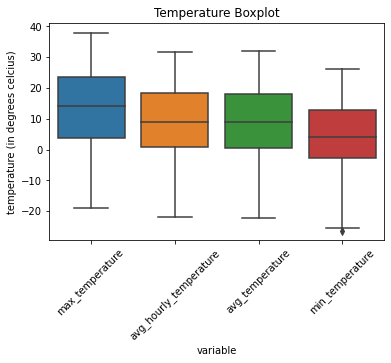

In [19]:
cols = ['max_temperature','avg_hourly_temperature','avg_temperature','min_temperature']
temp_box_data = data_reduced.melt(id_vars='date', value_vars= cols)
sns.boxplot(x='variable', y='value', data= temp_box_data)
plt.xticks(rotation=45)
plt.ylabel('temperature (in degrees celcius)')
plt.title('Temperature Boxplot')
plt.show()

The min_temperature varibale has an outlier below the -20 degrees celcius temperature. All other temerature variables have no outliers.  

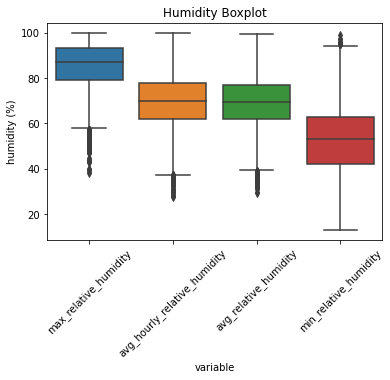

In [20]:
cols = ['max_relative_humidity','avg_hourly_relative_humidity','avg_relative_humidity','min_relative_humidity']
hum_box_data = data_reduced.melt(id_vars='date', value_vars= cols)
sns.boxplot(x='variable', y='value', data= hum_box_data)
plt.xticks(rotation=45)
plt.ylabel('humidity (%)')
plt.title('Humidity Boxplot')
plt.show()

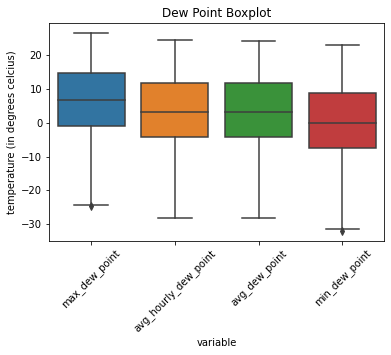

In [21]:
cols = ['max_dew_point','avg_hourly_dew_point','avg_dew_point','min_dew_point']
dew_box_data = data_reduced.melt(id_vars='date', value_vars= cols)
sns.boxplot(x='variable', y='value', data= dew_box_data)
plt.xticks(rotation=45)
plt.ylabel('temperature (in degrees celcius)')
plt.title('Dew Point Boxplot')
plt.show()

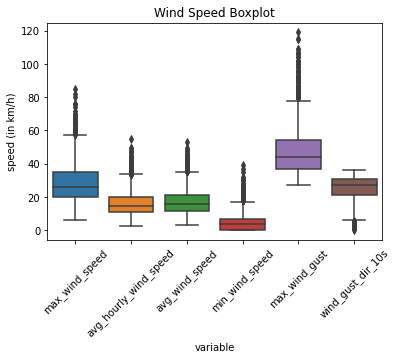

In [22]:
cols = ['max_wind_speed','avg_hourly_wind_speed','avg_wind_speed','min_wind_speed','max_wind_gust','wind_gust_dir_10s']
wind_box_data = data_reduced.melt(id_vars='date', value_vars= cols)
sns.boxplot(x='variable', y='value', data= wind_box_data)
plt.xticks(rotation=45)
plt.ylabel('speed (in km/h)')
plt.title('Wind Speed Boxplot')
plt.show()

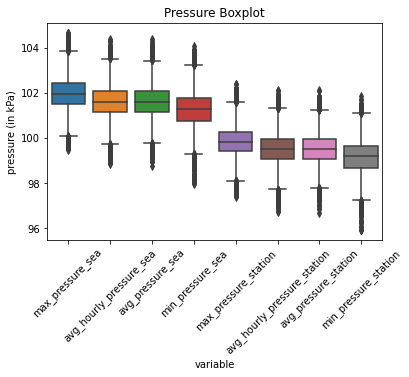

In [23]:
cols = ['max_pressure_sea','avg_hourly_pressure_sea','avg_pressure_sea','min_pressure_sea',
        'max_pressure_station','avg_hourly_pressure_station','avg_pressure_station','min_pressure_station']
press_box_data = data_reduced.melt(id_vars='date', value_vars= cols)
sns.boxplot(x='variable', y='value', data= press_box_data)
plt.xticks(rotation=45)
plt.ylabel('pressure (in kPa)')
plt.title('Pressure Boxplot')
plt.show()

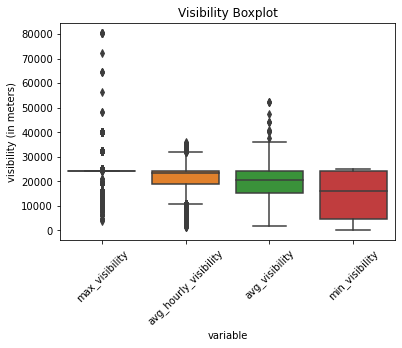

In [24]:
cols = ['max_visibility','avg_hourly_visibility','avg_visibility','min_visibility']
vis_box_data = data_reduced.melt(id_vars='date', value_vars= cols)
sns.boxplot(x='variable', y='value', data= vis_box_data)
plt.xticks(rotation=45)
plt.ylabel('visibility (in meters)')
plt.title('Visibility Boxplot')
plt.show()

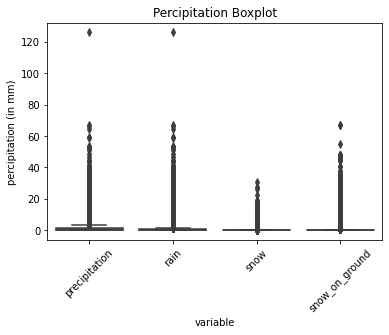

In [25]:
cols = ['precipitation','rain','snow','snow_on_ground']
rain_box_data = data_reduced.melt(id_vars='date', value_vars= cols)
sns.boxplot(x='variable', y='value', data= rain_box_data)
plt.xticks(rotation=45)
plt.ylabel('precipitation (in mm)')
plt.title('Precipitation Boxplot')
plt.show()

In the boxplot above, we see that there are many outiers in the variables related to precipitation; i.e. the precipitation, rain, snow and snow_on_ground variables. This could be due to the fact that there are simply more days in the year where it doesnt rain than days in the year when it rains. Therefore, we should be less concerned about the outliers present in these variables. 

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
# Exploratory Data Analysis 

### Univariate Analysis of Precipitation 

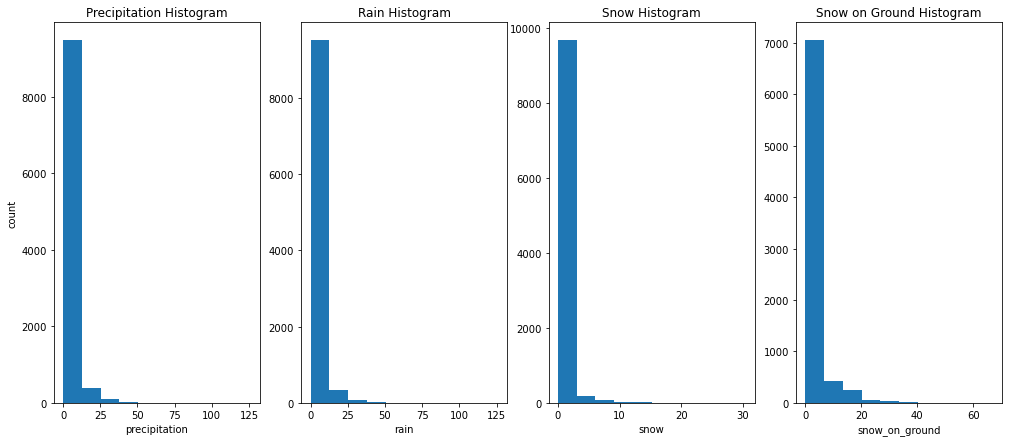

In [43]:
plt.figure(figsize=(17,7))
plt.subplot(1,4,1)
plt.hist(data_reduced[['precipitation']])
plt.xlabel('precipitation')
plt.ylabel('count')
plt.title("Precipitation Histogram")

plt.subplot(1,4,2)
plt.hist(data_reduced[['rain']])
plt.xlabel('rain')
plt.title("Rain Histogram")

plt.subplot(1,4,3)
plt.hist(data_reduced[['snow']])
plt.xlabel('snow')
plt.title("Snow Histogram")

plt.subplot(1,4,4)
plt.hist(data_reduced[['snow_on_ground']])
plt.xlabel('snow_on_ground')
plt.title("Snow on Ground Histogram")
plt.show()

As we take a deeper look into the distribution of the precipitation variables, we see that we do indeed have more days when it does not rains than rainy days in the dataset. 

### Precipitation vs Temperature 

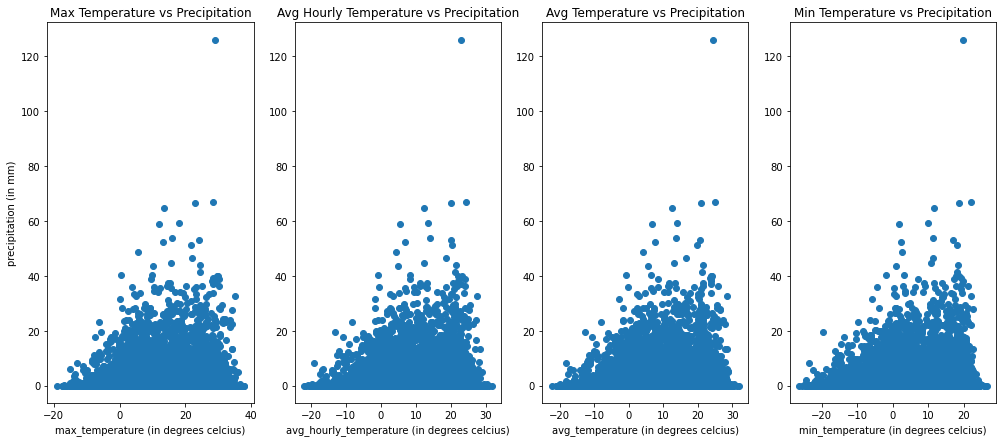

In [48]:
plt.figure(figsize=(17,7))
plt.subplot(1,4,1)
plt.scatter(data_reduced[['max_temperature']], data_reduced[['precipitation']])
plt.xlabel('max_temperature (in degrees celcius)')
plt.ylabel('precipitation (in mm)')
plt.title("Max Temperature vs Precipitation")

plt.subplot(1,4,2)
plt.scatter(data_reduced[['avg_hourly_temperature']], data_reduced[['precipitation']])
plt.xlabel('avg_hourly_temperature (in degrees celcius)')
plt.title("Avg Hourly Temperature vs Precipitation")

plt.subplot(1,4,3)
plt.scatter(data_reduced[['avg_temperature']], data_reduced[['precipitation']])
plt.xlabel('avg_temperature (in degrees celcius)')
plt.title("Avg Temperature vs Precipitation")

plt.subplot(1,4,4)
plt.scatter(data_reduced[['min_temperature']], data_reduced[['precipitation']])
plt.xlabel('min_temperature (in degrees celcius)')
plt.title("Min Temperature vs Precipitation")
plt.show()

### Humidity vs Precipiation 

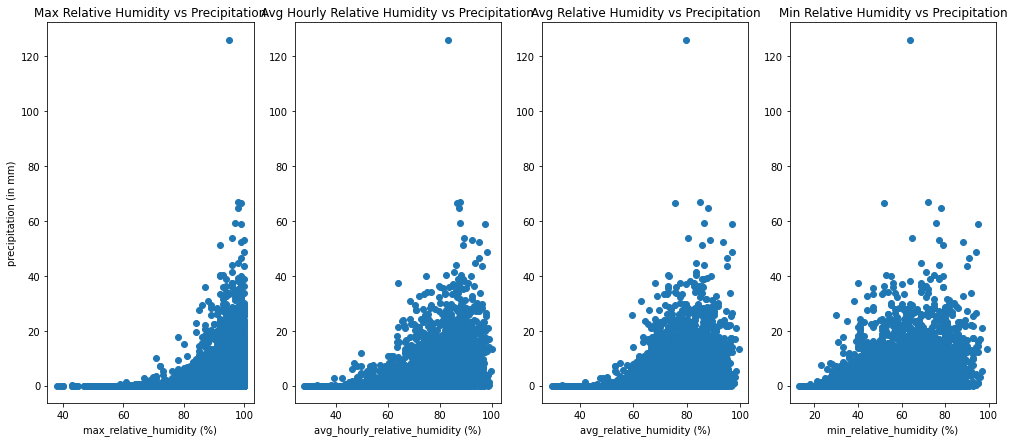

In [47]:
plt.figure(figsize=(17,7))
plt.subplot(1,4,1)
plt.scatter(data_reduced[['max_relative_humidity']], data_reduced[['precipitation']])
plt.xlabel('max_relative_humidity (%)')
plt.ylabel('precipitation (in mm)')
plt.title("Max Relative Humidity vs Precipitation")

plt.subplot(1,4,2)
plt.scatter(data_reduced[['avg_hourly_relative_humidity']], data_reduced[['precipitation']])
plt.xlabel('avg_hourly_relative_humidity (%)')
plt.title("Avg Hourly Relative Humidity vs Precipitation")

plt.subplot(1,4,3)
plt.scatter(data_reduced[['avg_relative_humidity']], data_reduced[['precipitation']])
plt.xlabel('avg_relative_humidity (%)')
plt.title("Avg Relative Humidity vs Precipitation")

plt.subplot(1,4,4)
plt.scatter(data_reduced[['min_relative_humidity']], data_reduced[['precipitation']])
plt.xlabel('min_relative_humidity (%)')
plt.title("Min Relative Humidity vs Precipitation")
plt.show()

### Dew Point vs Precipitation 

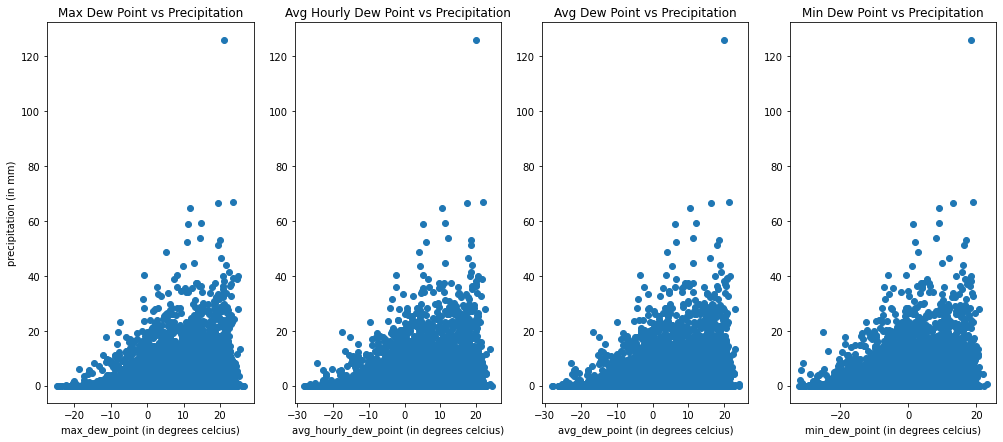

In [50]:
plt.figure(figsize=(17,7))
plt.subplot(1,4,1)
plt.scatter(data_reduced[['max_dew_point']], data_reduced[['precipitation']])
plt.xlabel('max_dew_point (in degrees celcius)')
plt.ylabel('precipitation (in mm)')
plt.title("Max Dew Point vs Precipitation")

plt.subplot(1,4,2)
plt.scatter(data_reduced[['avg_hourly_dew_point']], data_reduced[['precipitation']])
plt.xlabel('avg_hourly_dew_point (in degrees celcius)')
plt.title("Avg Hourly Dew Point vs Precipitation")

plt.subplot(1,4,3)
plt.scatter(data_reduced[['avg_dew_point']], data_reduced[['precipitation']])
plt.xlabel('avg_dew_point (in degrees celcius)')
plt.title("Avg Dew Point vs Precipitation")

plt.subplot(1,4,4)
plt.scatter(data_reduced[['min_dew_point']], data_reduced[['precipitation']])
plt.xlabel('min_dew_point (in degrees celcius)')
plt.title("Min Dew Point vs Precipitation")
plt.show()

### Wind Speed vs Precipitation 

In [ ]:
cols = ['max_wind_speed','avg_hourly_wind_speed','avg_wind_speed','min_wind_speed','max_wind_gust','wind_gust_dir_10s']

